In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math
import scipy.stats as stats

# The population can have an arbitrary distribution
# It has an expectation MU and std-dev SIGMA
MU = 0
SIGMA = 0

# define some functions to generate samples from a given distribution:


def normal():
	global MU, SIGMA
	MU = 3
	SIGMA = 3
	while True:
		yield random.gauss(MU, SIGMA)  # normal distribution


def uniform():
	global MU, SIGMA
	MU = 0.5
	SIGMA = 1/math.sqrt(12)
	while True:
		yield random.uniform(0, 1)  # uniform distribution


def triangular():
	global MU, SIGMA
	a, b, c = -5, 20, 0
	MU = (a+b+c)/3
	SIGMA = math.sqrt((a*a + b*b + c*c - a*b-a*c-b*c)/18)
	while True:
		yield random.triangular(a, b, c)  # triangular distribution


def bernoulli():
	global MU, SIGMA
	p = 0.5
	MU = p
	SIGMA = math.sqrt(p*(1-p))
	while True:
		if random.random() > 0.5:
			yield 1
		else:
			yield 0

def exponential():
	global MU, SIGMA
	lambd = 2
	MU = 1/lambd
	SIGMA = 1/(lambd**2)
	while True:
		yield random.expovariate(lambd)


# set the distribution here
RAND = uniform()

# histogram settings
sample_sizes = [25, 100, 400, 1600]
num_samples = 5000
print("Num samples=", num_samples)
print("Population Distribution = ", str(RAND.__name__))

def plot():
	for N in sample_sizes:
		data = []  # a list of sample averages

		for i in range(num_samples):
			# pick a sample of size N and find the sample average
			x = 0
			for i in range(N):
				x += next(RAND)
			x = x/N
			# store the sample average in the data list
			data.append(x)

		print("plotting for sample size=", N, "...")
		# plot a histogram of all sample averages
		num_bins = 50
		plt.hist(data, bins=num_bins, label="sample size:" +
				str(N), density=True, alpha=0.5)

		# plot a normal curve superimposed on the histogram
		S = SIGMA/(math.sqrt(N))
		x_axis = np.linspace(min(data), max(data), num_bins*3)
		plt.plot(x_axis, stats.norm.pdf(x_axis, MU, S), color='k')
		# Sample Standard Deviation
		std_dev_sample = math.sqrt(sum((data - np.mean(data))**2)/N)
		print(f'Expected std_dev = {S}\n Found std_dev = {std_dev_sample}\n')


	plt.legend()
	plt.show()


Num samples= 5000
Population Distribution =  uniform


plotting for sample size= 25 ...
Expected std_dev = 1.0801234497346432
 Found std_dev = 15.33440972819763

plotting for sample size= 100 ...
Expected std_dev = 0.5400617248673216
 Found std_dev = 3.7978564292132533

plotting for sample size= 400 ...
Expected std_dev = 0.2700308624336608
 Found std_dev = 0.9474726941569581

plotting for sample size= 1600 ...
Expected std_dev = 0.1350154312168304
 Found std_dev = 0.2387645620086106



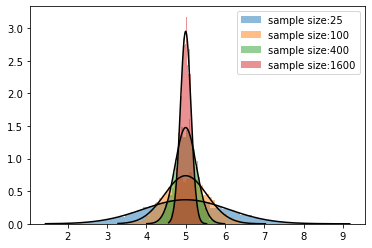

In [3]:
RAND = triangular()
plot()


plotting for sample size= 25 ...
Expected std_dev = 0.1
 Found std_dev = 1.42273899672429

plotting for sample size= 100 ...
Expected std_dev = 0.05
 Found std_dev = 0.3515048537360461

plotting for sample size= 400 ...
Expected std_dev = 0.025
 Found std_dev = 0.08718671745168519

plotting for sample size= 1600 ...
Expected std_dev = 0.0125
 Found std_dev = 0.022059078364275713



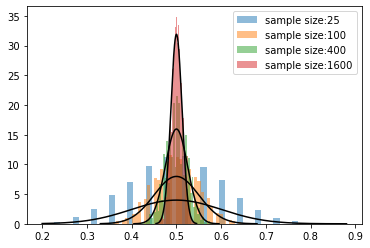

In [4]:
RAND = bernoulli()
plot()


plotting for sample size= 25 ...
Expected std_dev = 0.05
 Found std_dev = 1.4142469740307086

plotting for sample size= 100 ...
Expected std_dev = 0.025
 Found std_dev = 0.3517099672306021

plotting for sample size= 400 ...
Expected std_dev = 0.0125
 Found std_dev = 0.08790577104194718

plotting for sample size= 1600 ...
Expected std_dev = 0.00625
 Found std_dev = 0.022390400639779068



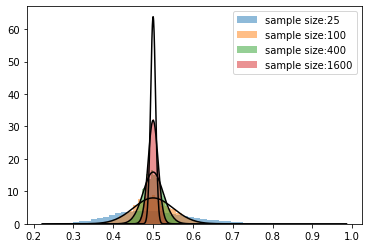

In [5]:
RAND = exponential()
plot()

plotting for sample size= 100 ...
Expected std_dev = 0.025
 Found std_dev = 0.35225228914172096

plotting for sample size= 400 ...
Expected std_dev = 0.0125
 Found std_dev = 0.08777198984874142

plotting for sample size= 1600 ...
Expected std_dev = 0.00625
 Found std_dev = 0.021754539296646495

plotting for sample size= 6400 ...
Expected std_dev = 0.003125
 Found std_dev = 0.005488611788985284



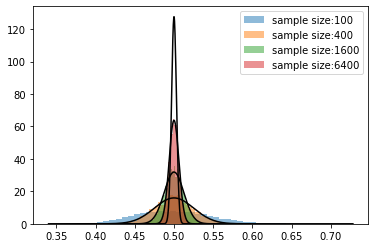

In [6]:
sample_sizes = [100, 400, 1600, 6400]
RAND = exponential()
plot()


plotting for sample size= 25 ...
Expected std_dev = 0.05
 Found std_dev = 1.4064811866998732

plotting for sample size= 100 ...
Expected std_dev = 0.025
 Found std_dev = 0.35256980179422537

plotting for sample size= 400 ...
Expected std_dev = 0.0125
 Found std_dev = 0.08798922034905352

plotting for sample size= 1600 ...
Expected std_dev = 0.00625
 Found std_dev = 0.021551094477732874



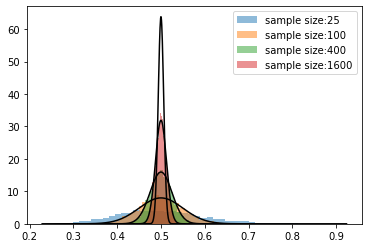

In [7]:
sample_sizes = [25, 100, 400, 1600]
RAND = exponential()
plot()


**Report**

Observations:

1. As sample size is increasing, the expected std_dev and measured std_dev are coming closer
2. As Number of samples is increasing, the std_dev is decreasing
3. All functions (Bernoulli, Triangular, Exponential, Uniform) have nearly - normal distribution with large samples size
